<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_221202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap 4. 합성곱 신경망(CNN)**

---



## **1. 합성곱 신경망**

  - `합성곱 신경망`(CNN : Convolutional Neural Network)
    - 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
    - 컴퓨터 비전 분야에서 많이 사용되며, 대표적으로 이미지 분류, 객체 탐지, 스타일 전이 등을 예로 들 수 있다.

  - `이미지 분류`
    - 이미지를 인식할 수 있는 능력을 모델이 갖추게 된다.

  - `객체 탐지`
    - 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술
    - 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려 준다.
    - 일반적으로 객체의 위치는 이미지의 좌표 값으로 나타내기 때문에, 경계 박스를 찾는 문제는 회귀분석으로 해결한다. 반면 클래스를 예측하는 문제는 분류 문제가 된다.

  - `스타일 전이`
    - 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술

### 1.1 이미지 표현

  - 손글씨 이미지는 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현할 수 있다.
    - `숫자 0`은 완전히 `검은색`을, `숫자 255`는 `흰색`을 나타낸다.
    - 그 중간에 있는 숫자들은 회색으로 표현된다.
    - 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타낸다고 이해할 수 있다.

  - 컬러 이미지는 R, G, B 채널로 구성된 3장의 이미지를 겹쳐서 표현한다.
    - 각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타낸다.
    - 숫자가 클수록 해당 색상을 더 강하게 표현한다.
    - 여기서 채널은 각각이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현하는 방식이다.

### 1.2 합성곱(Convolution)

  - 합성곱 연산
    - 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
    - 특성맵 : 합성곱 연산을 통해서 추출된 이미지
  
  - 합성곱 연산 알고리즘
    - 입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력된다.
    - 이러한 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영해 준다.
    - 이렇게 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 수행하게 된다.
  
  - 합성곱 연산의 예제
    - 3 x 3 사이즈를 가지는 커널이 첫 좌측 상단의 입력  이미지의 3 x 3 부분과 매칭되어 합성곱 연산을 수행한다.
    - 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나온다.
    - 이렇게 나온 결과는 추출된 이미지인 feature map의 좌측 상단의 첫 번째 값이 된다.

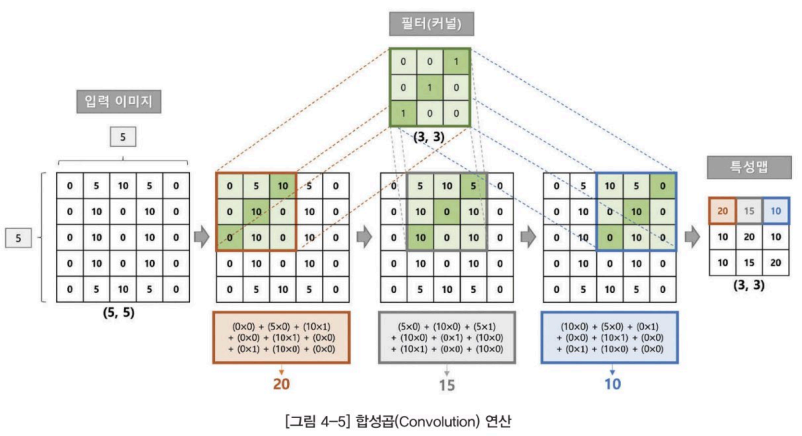
    
  - 합성곱 연산의 장점
    - 커널 사이즈가 3 x 3인 경우 총 9개의 가중치를 가지며, 오차 역전파 시 커널의 가중치를 업데이트한다.
    - 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치 때문이다.
    - 오차 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로, 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점이 있다.

### 1.3 채널(channel)

  - 채널
    - 입력 이미지를 구성하는 2차원 배열의 개수
  
  - 흑백 이미지는 단일 채널, 즉 채널의 개수가 1개인 이미지이다.
  - 컬러 이미지의 경우 R, G, B 3개의 채널을 가지는 이미지이므로, 채널 이미지 3장이 겹쳐서 이미지로 표현된다.
    - 컬러 이미지는 3개의 채널을 가지므로, 세로 5픽셀, 가로 5픽셀의 컬러 이미지를 shape으로 나타냈을 때는 (5,5,3)으로 표현된다.
  
  - 입력 이미지가 여러 개의 채널을 갖는 경우, 합성곱 연산 과정
    1. 입력 이미지의 채널 개수만큼 커널을 생성한다.
    2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행한다.
    3. 이 과정을 거치면 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵이 생성된다.

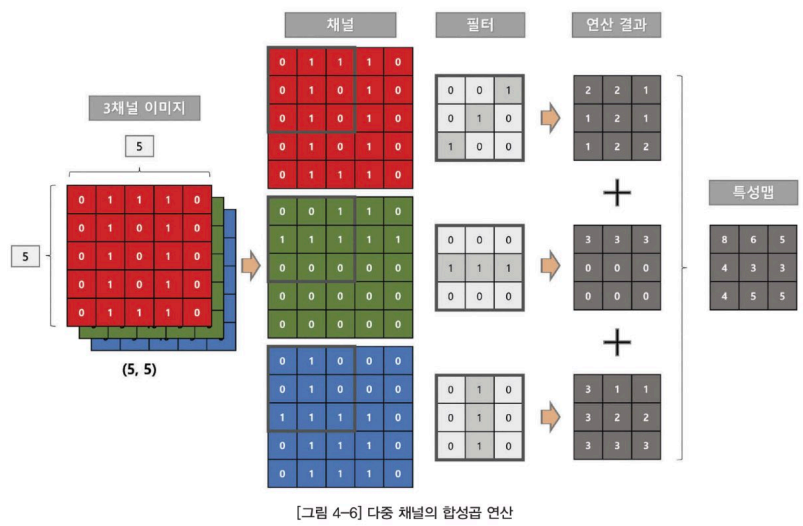

### 1.4 스트라이드(stride)
  - 스트라이드(stride)
    - 커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나가는데, 이때 이동하는 간격
    - 텐서플로 케라스에서 제공하는 `Conv2D` 레이어의 `strides 매개변수`에 스트라이드를 지정할 수 있다.

### 1.5 패딩(padding)
  - 패딩(padding)
    - 추출된 `특성맵의 크기가` 입력 이미지 대비 `줄어들지 않게 하는 설정`
    - 일반적으로 zero-padding을 사용하게 되며, 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출한다.
    - 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성맵의 크기가 줄어들지 않는다.
    - 텐서플로 케라스의 `Conv2D` 레이어에서 `padding = 'same'`으로 설정하면 `zero-padding`을 적용한다.

### 1.6 특성맵(feature map) 사이즈

  - 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식은 아래와 같다.

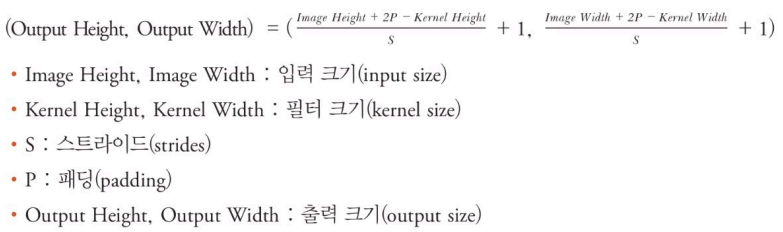

### 1.7 풀링(pooling)

  - 풀링(pooling) 레이어
    - 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
    - 이미지 축소를 통해 연산량을 감소하고 과대적합을 방지할 수 있다는 장점
    - 최대 풀링
      - 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었으며, 생각보다 성능이 좋아 합성곱 신경망과 같이 주로 사용
    - 평균 풀링
      - 픽셀들의 평균값을 출력 값으로 설정

---

## **2. 간단한 모델 생성**

  - mnist 손글씨 데이텃세을 활용해 간단한 구조의 합성곱 신경망 모델을 만들어 보자.

### 2.1 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


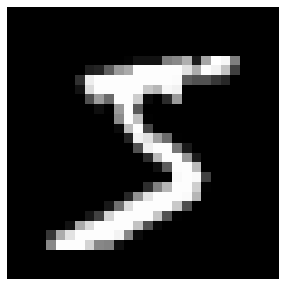

In [2]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize = (5, 5))
  plt.imshow(data[idx], cmap = 'gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [3]:
# 훈련 셋과 검증 셋의 이미지 픽셀을 나타내는 값의 최소값, 최대값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [4]:
# 입력 이미지 픽셀 값 정규화 변환
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


  - `mnist 데이터셋`은 색상을 나타내는 `채널이 1개인 모노 컬러 이미지`로 구성된다.
  - CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해준다.
  - `tf.newaxis` 축을 텐서 배열에 직접 추가해 (60000, 28, 28) 형태의 텐서가 `(60000, 28, 28, 1) 형태로 변환`되도록 한다.

In [5]:
# 채널 추가
print(x_train.shape, x_valid.shape)

# 가장 마지막 축에 채널을 추가하기 위해 [..., tf.newaxis]로 작성
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2.2 Sequential API로 모델 생성 및 학습

  - `Sequential API`를 사용해 `합성곱 레이어 1개`, `풀링 레이어 1개`를 적용하는 간단한 모델을 만든다.
    - 최종 분류기로 Dense 레이어를 적용하기 위해, `Flatten` 층을 추가하여 `1차원 배열`로 펼쳐준다.
    - 합성곱은 Conv2D 레이어를 사용하고, `(3,3) 크기의 서로 다른 32가지 종류의 커널`을 적용한다.
    - ReLU 활성화 함수를 적용하며, name 속성에 레이어 이름을 'conv'라고 지정한다.
    - `풀링 레이어`는 `(2,2) 크기로 최대 풀링`을 적용한다.
    - `최종 분류기`는 정답 레이블이 0~9까지 10개의 값을 가지므로 `노드 개수를 10`으로 하고, `분류 클래스가 10개인 다중 분류` 문제이므로 활성화 함수로 `softmax`를 적용한다.

In [8]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',
                           input_shape = (28, 28, 1), name = 'conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name = 'pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [10]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2164 - accuracy: 0.9394 - val_loss: 0.0828 - val_accuracy: 0.9766
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0786 - accuracy: 0.9768 - val_loss: 0.0687 - val_accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0671 - val_accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0487 - accuracy: 0.9861 - val_loss: 0.0501 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0503 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0548 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0532 -

In [11]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0566 - accuracy: 0.9838


[0.056574802845716476, 0.9837999939918518]

  - 검증 셋에 대해서 약 98%의 정확도를 나타낸다.

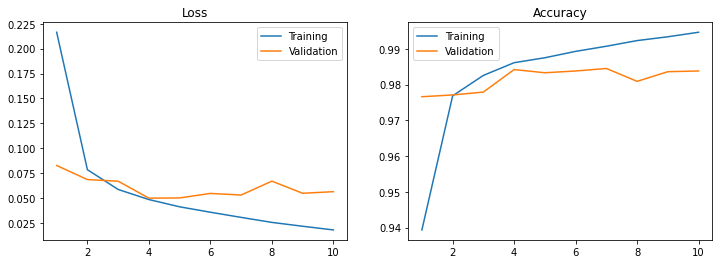

In [12]:
# 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize = (12, 4))

  axes[0].plot(range(1, epoch + 1), loss, label = 'Training')
  axes[0].plot(range(1, epoch + 1), val_loss, label = 'Validation')
  axes[0].legend(loc = 'best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch + 1), acc, label = 'Training')
  axes[1].plot(range(1, epoch + 1), val_acc, label = 'Validation')
  axes[1].legend(loc = 'best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

  - 위의 그래프를 보면 훈련 셋에 대한 손실은 계속 줄어드는데, 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않는다.
  - 4 epoch 이후부터는 모델이 과대적합으로 진행되었다는 것을 파악할 수 있다.

### 2.3 모델 구조 파악

  - 합성곱 신경망 구조
    1. `(28, 28, 1)` 형태의 입력 텐서가 `Conv2D`를 거치면서 `(26, 26, 32)` 형태로 변환된다.
      - `(3, 3) 크기의 합성곱 필터`를 사용하기 때문에 이미지 `가로, 세로 크기가 2씩 줄어든다`.
      - (28, 28, 1) 이미지에 서로 다른 32개의 커널을 적용해서 32가지 종류의 피처를 추출하는 것이다.
    2. `(2, 2) 크기의 풀링 레이어`를 적용했기 때문에 `이미지의 크기가 절반`으로 줄어든다.
      - 따라서 풀링 레이어를 거치면 `(13, 13, 32)` 텐서로 변환되고, Flatten 층에서 3차원 텐서를 `1차원 텐서로 펼치면 5408개(13 x 13 x 32)`의 원소를 갖는 1차원 벡터가 된다.
    3. 이 벡터를 출력 노드 10개인 Dense 레이어로 보내면 최종 분류 값을 예측해 출력한다.

In [13]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [15]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [16]:
# 레이어
model.layers

  - 우리가 작성한 모델은 총 4개의 레이어로 구성된다.

In [17]:
# 첫 번째 레이어 선택
model.layers[0]

In [18]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [19]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

  - 이처럼 Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어나면서, (None, 26, 26, 32)의 형태를 갖는다.

  - 각 레이어의 가중치 행렬을 추출할 수 있다.
  - 코드를 실행해보면 2개의 텐서플로 변수 행렬이 확인된다.
    - 첫 번째 변수 ('conv/kernel:0')
      - 커널 행렬의 가중치
    - 두 번째 변수 ('conv/bias:0')
      - 각 커널의 상수항

In [20]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-8.30081046e-01,  2.29549602e-01,  2.52674192e-01,
           -8.42295766e-01, -5.51247180e-01,  5.18243730e-01,
            8.12069029e-02,  6.06700815e-02, -8.42682242e-01,
            2.38666996e-01,  3.64086151e-01,  1.34744301e-01,
           -1.47050440e-01, -7.48489201e-01,  1.80735990e-01,
           -7.07995519e-02, -1.01820815e+00, -1.77773610e-02,
           -2.48594150e-01, -7.22618461e-01,  3.60598005e-02,
           -6.76205993e-01,  4.28631186e-01, -7.20943630e-01,
            7.34880418e-02, -7.06249550e-02, -6.77124262e-01,
            2.04655007e-01, -6.83221817e-01,  1.08835466e-01,
           -1.19590454e-01,  5.47336638e-01]],
 
         [[-1.05563462e+00,  3.66321653e-01, -6.15399629e-02,
           -2.83859801e-02, -2.53144443e-01,  6.52386487e-01,
            1.77298635e-01, -3.80176038e-01,  5.08128032e-02,
            2.47279555e-01,  1.65923521e-01,  1.82190031e-01,
           

  - 실행 결과, 커널 가중치의 shape이 (3, 3, 1, 32)임을 알 수 있다.
    - (3, 3) : 필터의 크기
    - (1) : 입력층의 채널 개수
    - (32) : 출력층의 채널 개수
    - layers[0]의 학습 가능한 파라미터 수는 3 x 3 x 1 x 32 = 288개이다.

  - 상수항의 가중치 shape은 (32, )이다.

  - 따라서 layers[0]의 총 학습 가능한 파라미터 수는 288 + 32 = 320개이다.

In [21]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-8.30081046e-01,  2.29549602e-01,  2.52674192e-01,
          -8.42295766e-01, -5.51247180e-01,  5.18243730e-01,
           8.12069029e-02,  6.06700815e-02, -8.42682242e-01,
           2.38666996e-01,  3.64086151e-01,  1.34744301e-01,
          -1.47050440e-01, -7.48489201e-01,  1.80735990e-01,
          -7.07995519e-02, -1.01820815e+00, -1.77773610e-02,
          -2.48594150e-01, -7.22618461e-01,  3.60598005e-02,
          -6.76205993e-01,  4.28631186e-01, -7.20943630e-01,
           7.34880418e-02, -7.06249550e-02, -6.77124262e-01,
           2.04655007e-01, -6.83221817e-01,  1.08835466e-01,
          -1.19590454e-01,  5.47336638e-01]],

        [[-1.05563462e+00,  3.66321653e-01, -6.15399629e-02,
          -2.83859801e-02, -2.53144443e-01,  6.52386487e-01,
           1.77298635e-01, -3.80176038e-01,  5.08128032e-02,
           2.47279555e-01,  1.65923521e-01,  1.82190031e-01,
           1.79528683e-01,  

In [22]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.1010296 , -0.27193764, -0.28620705, -0.04637985, -0.23333591,
        0.00462068, -0.24680772, -0.18007316, -0.01272391, -0.40107474,
       -0.42215124, -0.1800849 , -0.24695955, -0.06390189, -0.04057698,
       -0.01047277,  0.1378525 , -0.1306648 , -0.08871379, -0.11267298,
       -0.05294573, -0.09393551, -0.5166683 ,  0.00687349, -0.1667061 ,
       -0.32746482, -0.01377244, -0.16488194, -0.02329798, -0.17437062,
        0.09473304, -0.1636994 ], dtype=float32)>

In [23]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

  - 다음으로 모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 activator 모델을 정의한다.
  - 첫 번째 샘플에 대하여 각 레이어의 출력을 예측한다.

In [24]:
# 샘플 이미지와 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs = model.input,
                           outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 86ms/step


2

In [25]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

  - 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화해보자.

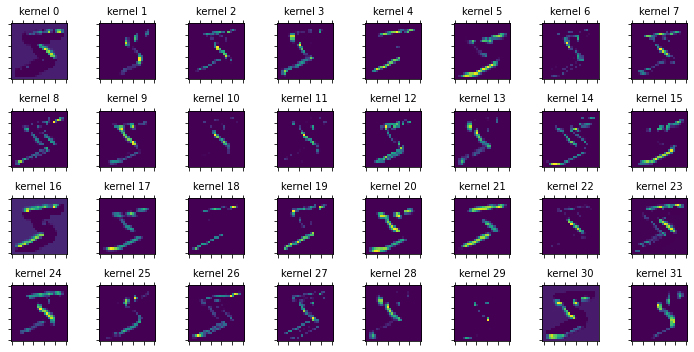

In [26]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap = 'viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)

plt.tight_layout()
plt.show()

  - 출력 이미지의 특징이 조금씩 차이가 있는 것을 볼 수 있다.
  - 이처럼 각 커널은 입력 이미지로부터 서로 다른 피처를 추출하는 역할을 한다.

  - 두 번째 레이어는 최대 풀링 레이어로, 여기서 출력하는 텐서는 (1, 13, 13, 32) 형태를 갖는다.

In [27]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


  - 두 번째 레이어에서 각 커널별로 출력되는 특성맵 이미지를 시각화해보자.

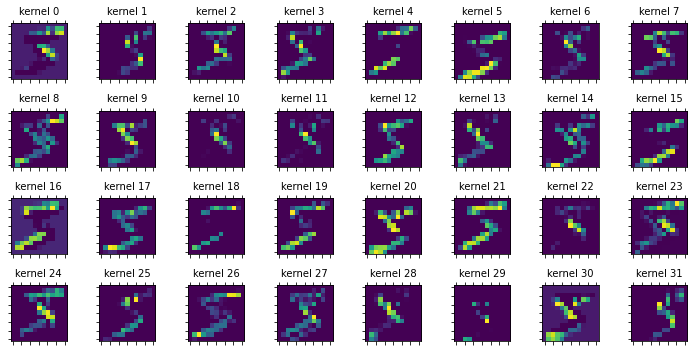

In [28]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap = 'viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)

plt.tight_layout()
plt.show()

  - 앞서 첫 번째 레이어인 Conv2D 출력 이미지에 비해 화소 크기가 굵어진 것을 볼 수 있다.
  - 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에, 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있다.

---

## **3. 복잡한 모델 생성**

### 3.1 데이터셋 준비

In [29]:
import tensorflow as tf
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


  - 0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지를 판단하는 정답(y_odd)을 새로 만들어서 추가하기로 한다.
  - 다음과 같이 y_train 값이 홀수면 1, 짝수면 0으로 하는 y_train_odd 배열을 새로 만든다.

In [30]:
# 새로운 출력 값 배열 생성(홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [32]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y % 2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [33]:
# 정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3.2 Functional API로 다중 입력, 다중 출력 레이어 생성

  - 다음 코드에서 `입력 레이어 input`의 경우, `Conv2D` 레이어와 `Flatten` 레이어의 입력으로 사용된다. 따라서 입력 레이어는 `2개의 출력`을 갖게 된다.
  - `서로 다른 2개의 출력`은 각각 `다른 레이어의 입력`으로 사용되고, 최종적으로 `Concatenate 레이어에서 합쳐`진 다음 `Dense 레이어를 통과`한다.
  - 이처럼 함수의 입력과 출력으로 표현할 수 있어서 자유롭게 모델 구조를 정의할 수 있는 장점이 있다.

In [35]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1))

# 첫 번째 입력 - Conv2D 레이어
conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

# 두 번째 입력 - Flatten 레이어
flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_1[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

  - 앞서 정의한 모델 구조를 그래프로 출력하면 다음과 같다.

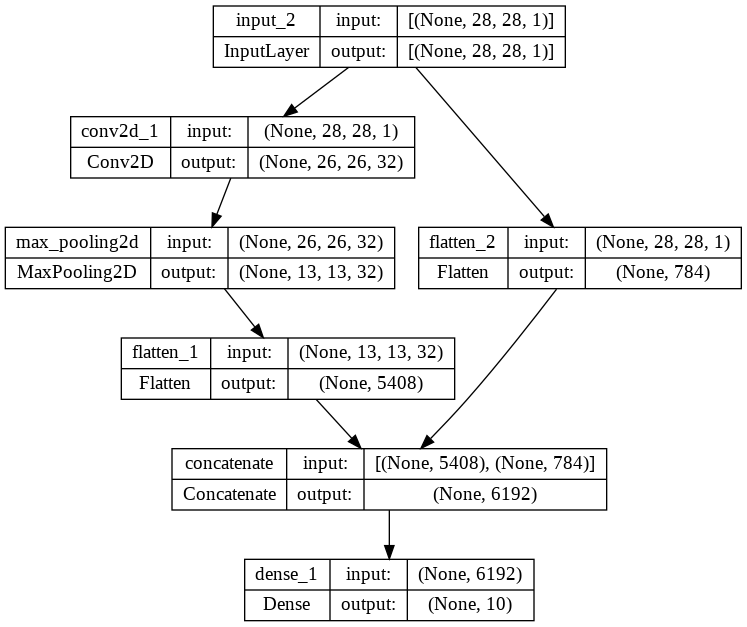

In [39]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

  - 입력 레이어가 2개의 출력으로 나누어지고, 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조를 시각적으로 확인할 수 있다.

In [40]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs = 10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2089 - accuracy: 0.9400 - val_loss: 0.0881 - val_accuracy: 0.9734
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0804 - accuracy: 0.9760 - val_loss: 0.0670 - val_accuracy: 0.9779
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0609 - val_accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0510 - accuracy: 0.9850 - val_loss: 0.0573 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0556 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0544 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0538 -

### 3.3 다중 출력 분류 모델

  - 이번에는 두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 만들어 보자.
  - 다음은 0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델을 정의하는 코드이다.
  - 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심이다. 

In [50]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1), name = 'inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [51]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


  - 모델의 구조를 그림으로 그려보면 다음과 같다.

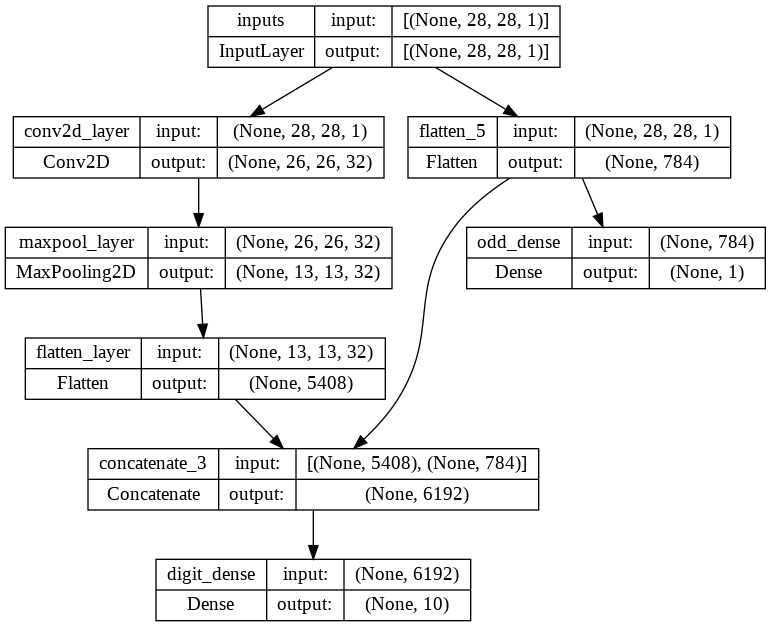

In [52]:
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'multi_output_cnn.png')

  - 모델 컴파일 시 Dense 레이어에서 name 속성으로 지정한 'digit_dense', 'odd_dense'를 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정한다.
  - 모델 훈련 시 fit() 메소드를 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 한다.

In [53]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = {'digit_dense' : 'sparse_categorical_crossentropy', 'odd_dense' : 'binary_crossentropy'},
              loss_weights = {'digit_dense' : 1, 'odd_dense' : 0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics = ['accuracy'])

# 모델 훈련
history = model.fit({'inputs' : x_train_in}, {'digit_dense' : y_train, 'odd_dense' : y_train_odd},
                    validation_data = ({'inputs' : x_valid_in}, {'digit_dense' : y_valid, 'odd_dense' : y_valid_odd}), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3657 - digit_dense_loss: 0.2022 - odd_dense_loss: 0.3270 - digit_dense_accuracy: 0.9425 - odd_dense_accuracy: 0.8641 - val_loss: 0.2241 - val_digit_dense_loss: 0.0851 - val_odd_dense_loss: 0.2778 - val_digit_dense_accuracy: 0.9753 - val_odd_dense_accuracy: 0.8863
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2135 - digit_dense_loss: 0.0774 - odd_dense_loss: 0.2722 - digit_dense_accuracy: 0.9777 - odd_dense_accuracy: 0.8913 - val_loss: 0.1941 - val_digit_dense_loss: 0.0625 - val_odd_dense_loss: 0.2631 - val_digit_dense_accuracy: 0.9801 - val_odd_dense_accuracy: 0.8970
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1897 - digit_dense_loss: 0.0583 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.8961 - val_loss: 0.1838 - val_digit_dense_loss: 0.0547 - val_odd_dense_loss: 0.2581 - val_digit_dense_accuracy: 0.9823 -

In [54]:
# 모델 성능
model.evaluate({'inputs' : x_valid_in}, {'digit_dense' : y_valid, 'odd_dense' : y_valid_odd})

313/313 [==============================] - 4s 12ms/step - loss: 0.1880 - digit_dense_loss: 0.0601 - odd_dense_loss: 0.2559 - digit_dense_accuracy: 0.9832 - odd_dense_accuracy: 0.9001


[0.18802444636821747,
 0.060051269829273224,
 0.2559462785720825,
 0.9832000136375427,
 0.9000999927520752]

  - 숫자를 맞추는 문제는 98%의 정확도를 보인 반면, 홀수 여부를 판단하는 문제는 약 90% 정도의 정확도를 보인다.
  - 따라서 홀수 여부를 판단하는 분류기에 레이어를 더 추가해 예측 정확도를 높일 여지가 있다.

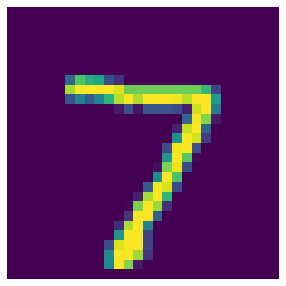

In [55]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

  - 검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률을 구하면 다음과 같다.
  - 첫 번째 예측 값은 10개 분류 레이블에 대한 확률을, 두 번째 예측 값은 홀수일 확률을 담고 있다.
  - 숫자 7 이미지에 대한 예측 확률을 print 함수로 출력하면 다음과 같다.

In [56]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 10ms/step
[8.68166758e-13 3.19445803e-10 2.09421858e-09 2.42231721e-07
 6.98190529e-13 2.29244661e-12 3.10620246e-20 9.99999702e-01
 1.29821665e-08 6.47788312e-09]
[0.9995265]


  - 넘파이 argmax 함수를 이용해 예측 확률을 실제 정답 레이블로 변환한다.

In [57]:
digit_labels = np.argmax(digit_preds, axis = -1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

  - 홀수, 짝수 여부에 대한 예측 레이블을 출력하면 다음과 같다.
  - 임계값으로 0.5를 지정하여 홀수일 확률이 0.5보다 큰 경우, 홀수로 분류하기로 한다.

In [58]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-58-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### 3.4 전이 학습(Transfer Learning)

  - 전이 학습(Transfer Learning)
    - 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념

  - 먼저 앞에서 학습한 모델에서 입력 레이어부터 'flatten_layer'라는 name 속성을 갖는 Flatten 층까지 해당하는 부분을 따로 추출하여, base_model 객체를 만든다.
  - 모델 개요를 출력해서 확인해보면, (28, 28, 1) 이미지를 받아서 5408개의 피처로 특징을 추출해 출력하는 모델이다.

In [59]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


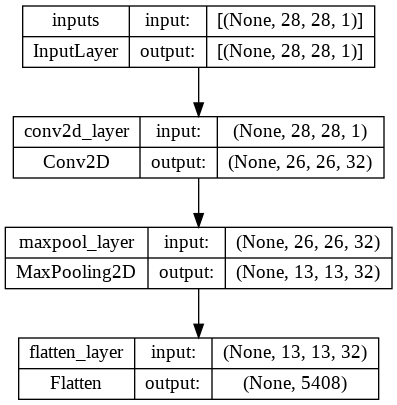

In [60]:
# 모델 구조 시각화
plot_model(base_model, show_shapes = True, show_layer_names = True, to_file = 'base_model.png')

  - Sequential API를 사용해 앞에서 정의한 base_model을 레이어로 추가하고, 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가해 준다.

In [61]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation = 'softmax')
])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


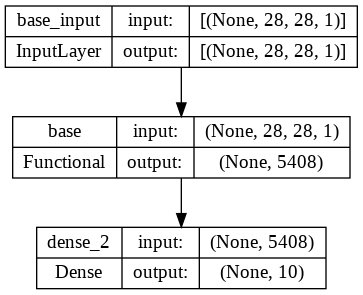

In [62]:
# 모델 구조 시각화
plot_model(digit_model, show_shapes = True, show_layer_names = True, to_file = 'digit_model.png')

  - 모델 구조를 출력해 보면, 최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가된 것을 확인할 수 있다.

In [63]:
# 모델 컴파일
digit_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data = (x_valid_in, y_valid),
                          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1307 - accuracy: 0.9628 - val_loss: 0.0631 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.0621 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0454 - accuracy: 0.9861 - val_loss: 0.0497 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0558 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0528 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0558 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0573 -

  - 모델 인스턴스의 trainable 속성을 False로 지정하면, 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트되지 않는다.

In [64]:
# 베이스 모델의 가중치 고정(Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs = model.input,
                                          outputs = base_model_output,
                                          name = 'base_frozen')

base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


  - 이번에는 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용해 구성해 본다.

In [65]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation = 'softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input,
                                           outputs = dense_output)
digit_model_frozen.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

  - 총 파라미터 개수는 54410개이고, 앞서 고정한 320개의 파라미터는 훈련이 불가능하다는 것이 표시되어 있다.
  - 즉, Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함되지 않게 된다는 뜻이다. 

In [66]:
# 모델 컴파일
digit_model_frozen.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                           metrics = ['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                                 validation_data = (x_valid_in, y_valid),
                                 epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1158 - accuracy: 0.9689 - val_loss: 0.0614 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0482 - accuracy: 0.9862 - val_loss: 0.0532 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0.0467 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0470 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0171 - accuracy: 0.9954 - val_loss: 0.0520 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0573 -

  - 모델 전체가 아닌 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능하다.
  - 다음은 Conv2D 레이어를 취소하고 trainable 속성을 False로 지정하는 예제이다.

In [67]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs = model.input,
                                           outputs = base_model_output,
                                           name = 'base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


  - 앞에서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델을 구성한다.

In [68]:
# Functional API 사용
dense_output2 = tf.keras.layers.Dense(10, activation = 'softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input,
                                            outputs = dense_output2)
digit_model_frozen2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [69]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                            metrics = ['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                  validation_data = (x_valid_in, y_valid),
                                  epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1146 - accuracy: 0.9691 - val_loss: 0.0538 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0489 - accuracy: 0.9859 - val_loss: 0.0493 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0512 - val_accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0577 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0532 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0590 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.0553 - val_